# Step 1: Read Data
In this step, I dropped the unused columns, and set the 'projectid' as index.

In [306]:
import pipeline as pl
import classifiers as clf
import evaluation as el
import temporal_validation as tv
import pandas as pd

In [246]:
df = pl.read_data('projects_2012_2013.csv')
df.head()

,teacher_acctid,schoolid,school_ncesid,school_latitude,school_longitude,school_city,school_state,school_metro,school_district,school_county,...,secondary_focus_subject,secondary_focus_area,resource_type,poverty_level,grade_level,total_price_including_optional_support,students_reached,eligible_double_your_impact_match,date_posted,datefullyfunded
projectid,,,,,,,,,,,,,,,,,,,,,
00001ccc0e81598c4bd86bacb94d7acb,96963218e74e10c3764a5cfb153e6fea,9f3f9f2c2da7edda5648ccd10554ed8c,1.709930e+11,41.807654,-87.673257,Chicago,IL,urban,Pershing Elem Network,Cook,...,Visual Arts,Music & The Arts,Supplies,highest poverty,Grades PreK-2,1498.61,31.0,f,4/14/13,5/2/13
0000fa3aa8f6649abab23615b546016d,2a578595fe351e7fce057e048c409b18,3432ed3d4466fac2f2ead83ab354e333,6.409801e+10,34.296596,-119.296596,Ventura,CA,urban,Ventura Unif School District,Ventura,...,Literature & Writing,Literacy & Language,Books,highest poverty,Grades 3-5,282.47,28.0,t,4/7/12,4/18/12
000134f07d4b30140d63262c871748ff,26bd60377bdbffb53a644a16c5308e82,dc8dcb501c3b2bb0b10e9c6ee2cd8afd,6.227100e+10,34.078625,-118.257834,Los Angeles,CA,urban,Los Angeles Unif Sch Dist,Los Angeles,...,Social Sciences,History & Civics,Technology,high poverty,Grades 3-5,1012.38,56.0,f,1/30/12,4/15/12
0001f2d0b3827bba67cdbeaa248b832d,15d900805d9d716c051c671827109f45,8bea7e8c6e4279fca6276128db89292e,3.600090e+11,40.687286,-73.988217,Brooklyn,NY,urban,New York City Dept Of Ed,Kings (Brooklyn),...,NaN,NaN,Books,high poverty,Grades PreK-2,175.33,23.0,f,10/11/12,12/5/12
0004536db996ba697ca72c9e058bfe69,400f8b82bb0143f6a40b217a517fe311,fbdefab6fe41e12c55886c610c110753,3.606870e+11,40.793018,-73.205635,Central Islip,NY,suburban,Central Islip Union Free SD,Suffolk,...,Literature & Writing,Literacy & Language,Technology,high poverty,Grades PreK-2,3591.11,150.0,f,1/8/13,3/25/13


In [192]:
df.dtypes

teacher_acctid                             object
schoolid                                   object
school_ncesid                             float64
school_latitude                           float64
school_longitude                          float64
school_city                                object
school_state                               object
school_metro                               object
school_district                            object
school_county                              object
school_charter                             object
school_magnet                              object
teacher_prefix                             object
primary_focus_subject                      object
primary_focus_area                         object
secondary_focus_subject                    object
secondary_focus_area                       object
resource_type                              object
poverty_level                              object
grade_level                                object


# Step 2: Explore Data
The exploration of data is divided into four parts:
- summary of continuous variables
- summary of categorical variables
- histographs of variables
- graph of correlation between variables

In [193]:
continuous_vars = ['total_price_including_optional_support', 'students_reached']
categorical_vars = ['teacher_prefix', 'school_metro', 'school_charter', 'school_magnet',\
                    'primary_focus_subject', 'primary_focus_area',\
                    'secondary_focus_subject', 'secondary_focus_area',\
                    'resource_type', 'poverty_level', 'grade_level',\
                    'eligible_double_your_impact_match']

In [194]:
pl.summary_continuous_vars(df, continuous_vars)

,total_price_including_optional_support,students_reached
count,124976.000000,124917.000000
mean,654.011811,95.445760
std,1098.015854,163.481912
min,92.000000,1.000000
25%,345.810000,23.000000
50%,510.500000,30.000000
75%,752.960000,100.000000
max,164382.840000,12143.000000


The table above shows the decriptive statistics of the continuous variables including the amount, mean, stand deviation and so on.

In [195]:
for cat in categorical_vars:
    print(pl.summary_categorical_vars(df, cat))

  count  teacher_prefix
0  Mrs.           60190
1   Ms.           48511
2   Mr.           16273
3   Dr.               2
      count  school_metro
0     urban         62267
1  suburban         33084
2     rural         14401
  count  school_charter
0     f          113340
1     t           11636
  count  school_magnet
0     f         114273
1     t          10703
                    count  primary_focus_subject
0                Literacy                  37408
1             Mathematics                  16859
2    Literature & Writing                  16141
3           Special Needs                   8348
4             Visual Arts                   5870
5        Applied Sciences                   5825
6   Environmental Science                   4835
7   Health & Life Science                   4185
8                   Music                   3931
9     History & Geography                   2701
10      Early Development                   2618
11    Character Education                   224

From the table above, we can find the decriptive statistics of categorical variables.

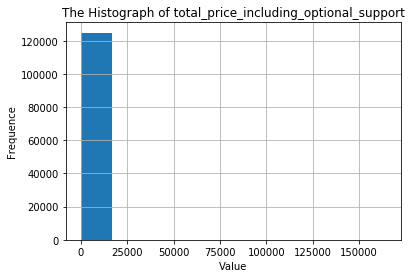

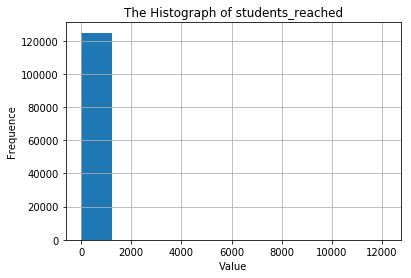

In [196]:
pl.generate_graph(df, continuous_vars)

From the histographs above, we can find that the distributions of the two continuous varibables are highly unbalanced-most values of these variables are concentrated on the left side.

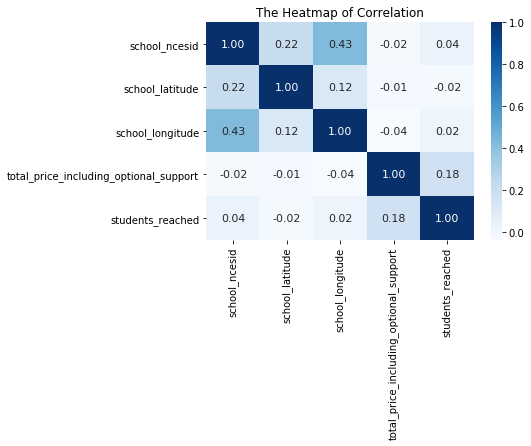

In [121]:
pl.generate_corr_graph(df)

From the table illustrating the relationships between variables of interest, we can find that the correlation between ```students_reached``` and ```total_price_including_optional_support``` is weak.

In [247]:
outliers = pl.count_outliers(df, continuous_vars)
outliers

,total_price_including_optional_support,students_reached
0,718,3790


In [198]:
outliers.sum().mean()

2254.0

There are a lot of outliers in both continuous variables, which might lead to the unbalanced distribution like the histograph shows.

# Step 3: Generate Features
In this step, I labeled 1 for projects that did not get fully funded within 60 days while labeled 0 for projects that got fully funded within 60 days.

In addition, I select the following variables as features:

'total_price_including_optional_support', 'students_reached', 'teacher_prefix', 'school_metro', 'school_charter', 'school_magnet', 'primary_focus_subject', 'primary_focus_area', 'secondary_focus_subject', 'secondary_focus_area', 'resource_type', 'poverty_level', 'grade_level', 'eligible_double_your_impact_match'.

In [248]:
# label 1 for projects that didn't get fully funded within 60 days, otherwise 0
df['date_posted'] = pd.to_datetime(df['date_posted'])
df['datefullyfunded'] = pd.to_datetime(df['datefullyfunded'])
df['days'] = (df['datefullyfunded'] - df['date_posted']).dt.days
df['NotFunded60days'] = [1 if x > 60 else 0 for x in df['days']]

In [249]:
df.groupby(['NotFunded60days']).size()

NotFunded60days
0    88966
1    36010
dtype: int64

In [201]:
features = ['total_price_including_optional_support', 'students_reached',\
            'teacher_prefix', 'school_metro', 'school_charter', 'school_magnet',\
            'primary_focus_subject', 'primary_focus_area', 'secondary_focus_subject',\
            'secondary_focus_area', 'resource_type', 'poverty_level', 'grade_level',\
            'eligible_double_your_impact_match']

# Step 4: Splitting Data
According to the requirement of the Assignment 3, the data spans Jan 1, 2012 to Dec 31, 2013, and the validation/test set should be a rolling window of 6 months (which should give you three test sets). Meanwhile, there is a 60-days gap between training set and testing set. Thus, we will have three datasets:
- traing set: 2012-01-01 to 2012-06-30; testing set: 2012-09-01 to 2013-03-01
- traing set: 2012-01-01 to 2012-12-31; testing set: 2012-03-01 to 2013-09-01
- traing set: 2012-01-01 to 2013-06-30; testing set: 2012-09-01 to 2013-12-31

Notice that in the last dataset, the testing set only includes four-month's data.

In [250]:
# First dataset
train1, test1, train_target1, test_target1 = \
    tv.splitting_data(df, features, 'NotFunded60days', 'date_posted', '2012-01-01', '2012-06-30', 6, 60)

In [251]:
# Second dataset
train2, test2, train_target2, test_target2 = \
    tv.splitting_data(df, features, 'NotFunded60days', 'date_posted', '2012-01-01', '2012-12-31', 6, 60)

In [252]:
# Third dataset
train3, test3, train_target3, test_target3 = \
    tv.splitting_data(df, features, 'NotFunded60days', 'date_posted', '2012-01-01', '2013-06-30', 6, 60)

# Step 5: Imputation/Pre-Process
In this step, I replaced the missing values with median.

In addition, I normalized the continuous variables ```total_price_including_optional_supportage``` and ```students_reached```, and converted them to categorical variables.

In [253]:
datasets = [(train1, test1), (train2, test2), (train3, test3)]

In [254]:
# imputation with median of training set
for df in datasets:
    for cat in categorical_vars:
        pl.fill_missing(df[0], df[1], cat, 'categorical', 'Unknonw')
    for ct in continuous_vars:
        pl.fill_missing(df[0], df[1], ct, 'continuous')

In [1]:
# Normalize continuous variables by scaling
for ds in datasets:
    for d in ds:
        pl.normalize_features(d, continuous_vars)

In [255]:
# discretize 'total_price_including_optional_support' and 'students_reached'
for dataset in datasets:
    for df in dataset:
        for var in continuous_vars:
            labels_var = ['low', 'mediate', 'high']
            min_var = df[var].min()
            max_var = df[var].max()
            q1 = df[var].quantile(0.25)
            q3 = df[var].quantile(0.75)
            bins_var = [min_var, q1, q3, max_var]
            df = pl.discretize_continuous_var(df, var, bins_var, labels_var)

In [257]:
# create dummy variables for all datasets
train1, test1 = pl.create_dummies(train1, test1, list(train1.columns.difference(continuous_vars)))
train2, test2 = pl.create_dummies(train2, test2, list(train2.columns.difference(continuous_vars)))
train3, test3 = pl.create_dummies(train3, test3, list(train3.columns.difference(continuous_vars)))

# Step 6: Experiment with Different Classifiers of Different Parameters
In this step, I choosed nine models (Logistic Regression, K-Nearest Neighbor, Decision Trees, ExtraTrees, SVM, Random Forests, AdaBoost, GradientBoosting and Bagging) to build the classiers, then do experiments with different parameters for these classifiers at two different k% of porjects predicted true.

For the step of doing experiments with different classifiers, to be more efficient, I choose first dataset.

In [149]:
ks = [10, 50]

In [150]:
pl.build_classifier(train1, test1, train_target1, test_target1, ks)

Model is : LR
Parameter is {'C': 0.01, 'penalty': 'l1'}
k is 10
Recall is 0.1578647199726246
Precision is 0.41104841104841106

k is 50
Recall is 0.6808486369339569
Precision is 0.3545589545589546

Parameter is {'C': 0.01, 'penalty': 'l2'}
k is 10
Recall is 0.17063989962358847
Precision is 0.4443124443124443

k is 50
Recall is 0.6844986882628037
Precision is 0.35645975645975647

Parameter is {'C': 0.1, 'penalty': 'l1'}
k is 10
Recall is 0.16847268164708568
Precision is 0.4386694386694387

k is 50
Recall is 0.6844986882628037
Precision is 0.35645975645975647

Parameter is {'C': 0.1, 'penalty': 'l2'}
k is 10
Recall is 0.1696133226873503
Precision is 0.44163944163944163

k is 50
Recall is 0.6883768677997034
Precision is 0.35847935847935847

Parameter is {'C': 1, 'penalty': 'l1'}
k is 10
Recall is 0.16938519447929737
Precision is 0.441045441045441

k is 50
Recall is 0.6867799703433329
Precision is 0.35764775764775764

Parameter is {'C': 1, 'penalty': 'l2'}
k is 10
Recall is 0.16949925858332

k is 10
Recall is 0.14520360442568725
Precision is 0.3780813780813781

k is 50
Recall is 0.5992928025550359
Precision is 0.3120879120879121

Parameter is {'criterion': 'gini', 'max_depth': 100, 'min_samples_leaf': 2}
k is 10
Recall is 0.12296110414052698
Precision is 0.3201663201663202

k is 50
Recall is 0.5582297251055093
Precision is 0.2907038907038907

Parameter is {'criterion': 'gini', 'max_depth': 100, 'min_samples_leaf': 10}
k is 10
Recall is 0.14429109159347553
Precision is 0.3757053757053757

k is 50
Recall is 0.5989506102429566
Precision is 0.3119097119097119

Parameter is {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 2}
k is 10
Recall is 0.14816927113037526
Precision is 0.3858033858033858

k is 50
Recall is 0.6670468803467549
Precision is 0.34737154737154735

Parameter is {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 10}
k is 10
Recall is 0.14908178396258698
Precision is 0.3881793881793882

k is 50
Recall is 0.6664765598266226
Precision is 0.3470

k is 10
Recall is 0.1563818866202806
Precision is 0.4071874071874072

k is 50
Recall is 0.6659062393064903
Precision is 0.3467775467775468

Parameter is {'max_depth': 50, 'min_samples_split': 10, 'n_estimators': 1}
k is 10
Recall is 0.1210220143720771
Precision is 0.3151173151173151

k is 50
Recall is 0.5813847382228813
Precision is 0.30276210276210275

Parameter is {'max_depth': 50, 'min_samples_split': 10, 'n_estimators': 10}
k is 10
Recall is 0.14919584806661343
Precision is 0.3884763884763885

k is 50
Recall is 0.641952777460933
Precision is 0.3343035343035343

Parameter is {'max_depth': 50, 'min_samples_split': 10, 'n_estimators': 100}
k is 10
Recall is 0.1563818866202806
Precision is 0.4071874071874072

k is 50
Recall is 0.6695562906353371
Precision is 0.3486783486783487

Parameter is {'max_depth': 100, 'min_samples_split': 2, 'n_estimators': 1}
k is 10
Recall is 0.118284475875442
Precision is 0.307989307989308

k is 50
Recall is 0.5481920839511806
Precision is 0.2854766854766855

k is 10
Recall is 0.13413938633512035
Precision is 0.3492723492723493

k is 50
Recall is 0.5987224820349036
Precision is 0.3117909117909118

Parameter is {'criterion': 'gini', 'max_depth': 100, 'n_estimators': 10}
k is 10
Recall is 0.138245694080073
Precision is 0.35996435996435994

k is 50
Recall is 0.6102429565415763
Precision is 0.3177903177903178

Parameter is {'criterion': 'gini', 'max_depth': 100, 'n_estimators': 20}
k is 10
Recall is 0.1434926428652903
Precision is 0.37362637362637363

k is 50
Recall is 0.617314930991217
Precision is 0.32147312147312146

Parameter is {'criterion': 'gini', 'max_depth': 100, 'n_estimators': 50}
k is 10
Recall is 0.1434926428652903
Precision is 0.37362637362637363

k is 50
Recall is 0.6287213413938634
Precision is 0.3274131274131274

Parameter is {'criterion': 'entropy', 'max_depth': 5, 'n_estimators': 5}
k is 10
Recall is 0.1607163225732862
Precision is 0.41847341847341846

k is 50
Recall is 0.6810767651420098
Precision is 0.3546777546777547

Para

k is 10
Recall is 0.12204859130831527
Precision is 0.3177903177903178

k is 50
Recall is 0.5670126611155469
Precision is 0.29527769527769526

Parameter is {'learning_rate': 0.1, 'max_depth': 50, 'n_estimators': 100}
k is 10
Recall is 0.14565986084179308
Precision is 0.37926937926937926

k is 50
Recall is 0.5825253792631458
Precision is 0.30335610335610336

Parameter is {'learning_rate': 0.1, 'max_depth': 100, 'n_estimators': 1}
k is 10
Recall is 0.11702977073115091
Precision is 0.3047223047223047

k is 50
Recall is 0.5469373788068894
Precision is 0.28482328482328484

Parameter is {'learning_rate': 0.1, 'max_depth': 100, 'n_estimators': 10}
k is 10
Recall is 0.12432987338884453
Precision is 0.32373032373032373

k is 50
Recall is 0.5663282764913882
Precision is 0.29492129492129493

Parameter is {'learning_rate': 0.1, 'max_depth': 100, 'n_estimators': 100}
k is 10
Recall is 0.14702863009011063
Precision is 0.3828333828333828

k is 50
Recall is 0.5826394433671723
Precision is 0.30341550341

Based on the performances of different models with different grids at different k, I select 
seven models (Logistic Regression, Decision Trees, ExtraTrees, Random Forests, AdaBoost, GradientBoosting and Bagging) to run on the full datasets with the following parameter grid:

{'LR': {'C': 10, 'penalty': 'l1'},\
 
  'DT': {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 2},\
 
  'GB': {'n_estimators': 10, 'learning_rate' : 0.5, 'max_depth': 50},\
 
  'RF': {'max_depth': 5, 'n_estimators': 5},\
 
  'AB': {'n_estimators': 1},\
 
  'BAG': {'max_samples': 0.5, 'n_estimators': 20},\
 
 'ET': {'n_estimators': 5, 'max_depth': 5, 'criterion': 'gini'}}

# Step 7: Evaluate Models with the Best Parameters by Tempora l Validation
In this step, I use three dataset separated with different timestamp. In each set, evaluate each selected model with the best parameters on a basis of performance metrics (precision, recall and AUC_ROC at different percent (1%, 2%, 5%, 10%, 20%, 30%, 50%) of projects predicted true.

In [154]:
best_paras = {'LR': {'C': 10, 'penalty': 'l1'},\
'DT': {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 2},\
'GB': {'n_estimators': 10, 'learning_rate' : 0.5, 'max_depth': 50},\
'RF': {'max_depth': 5, 'n_estimators': 5},\
'AB': {'n_estimators': 1},\
'BAG': {'max_samples': 0.5, 'n_estimators': 20},\
'ET': {'n_estimators': 5, 'max_depth': 5, 'criterion': 'gini'}}

In [158]:
ks = [1, 2, 5, 10, 20, 30, 50]

<Figure size 432x288 with 0 Axes>

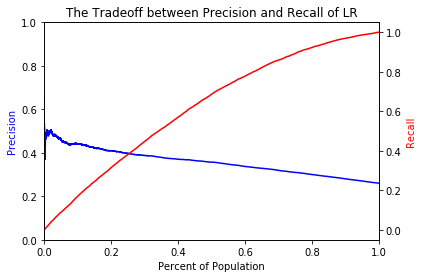

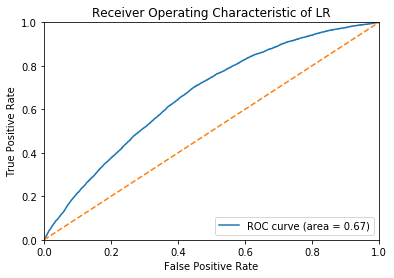

<Figure size 432x288 with 0 Axes>

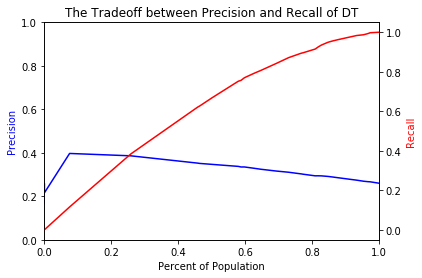

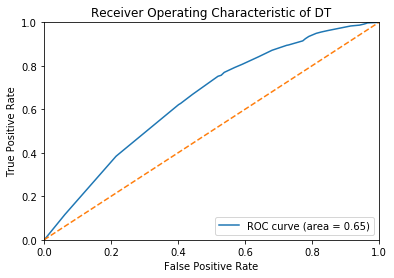

<Figure size 432x288 with 0 Axes>

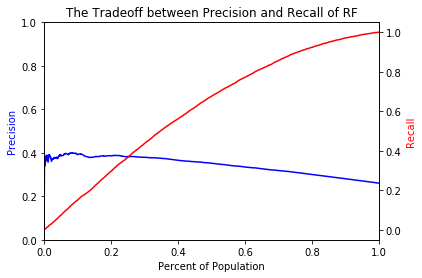

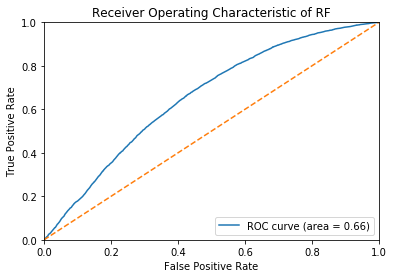

<Figure size 432x288 with 0 Axes>

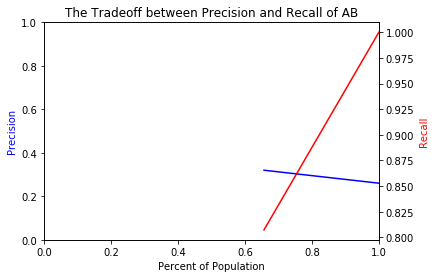

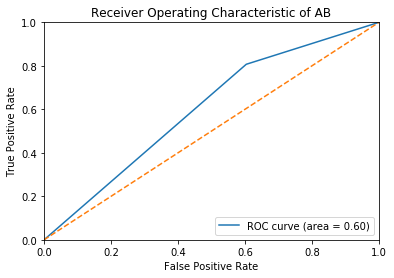

<Figure size 432x288 with 0 Axes>

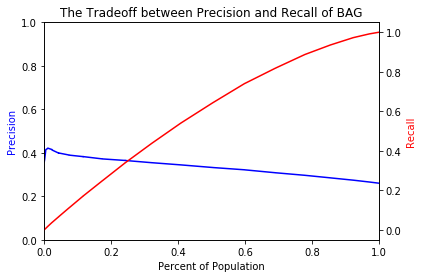

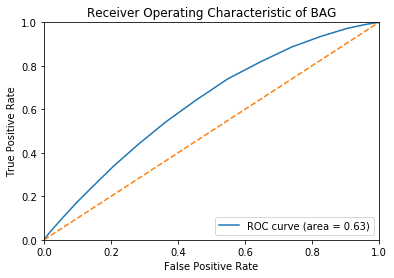

<Figure size 432x288 with 0 Axes>

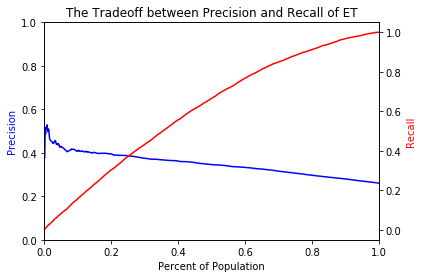

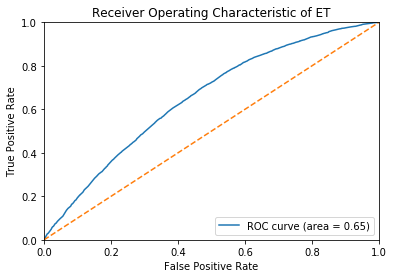

<Figure size 432x288 with 0 Axes>

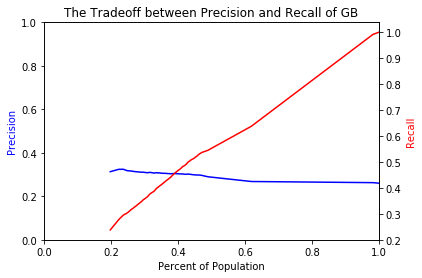

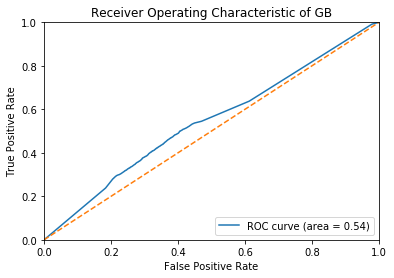

In [273]:
# Performances of different models using dataset 1
df1 = pl.evaluate_classifier(best_paras, train1, test1, train_target1, test_target1, ks)

<Figure size 432x288 with 0 Axes>

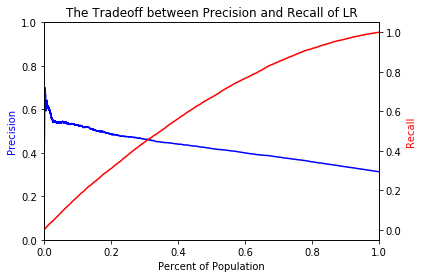

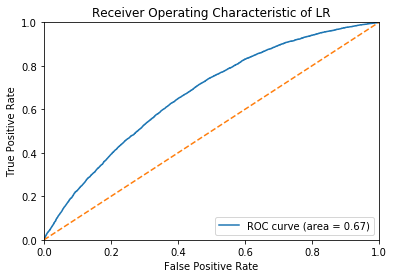

<Figure size 432x288 with 0 Axes>

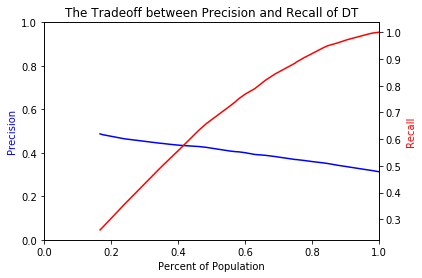

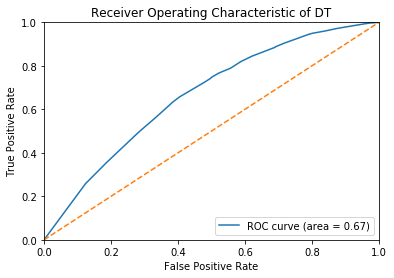

<Figure size 432x288 with 0 Axes>

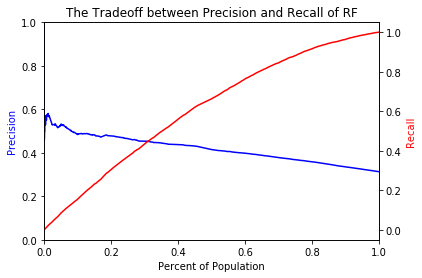

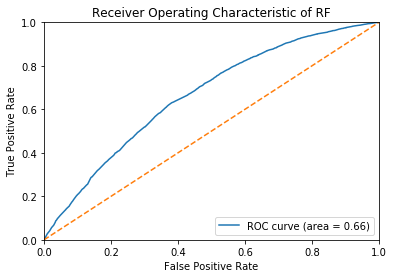

<Figure size 432x288 with 0 Axes>

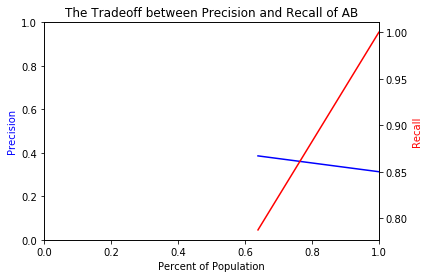

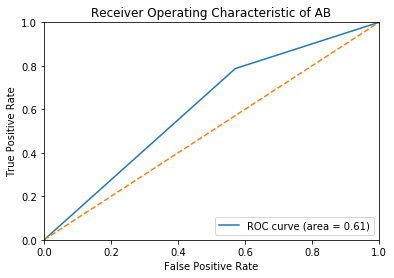

<Figure size 432x288 with 0 Axes>

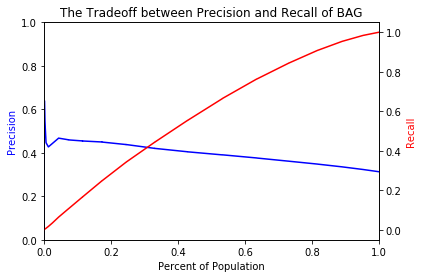

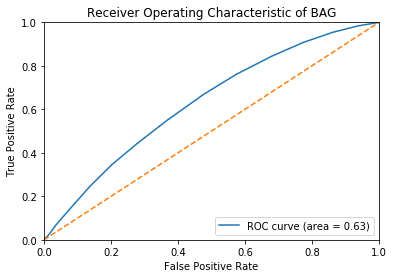

<Figure size 432x288 with 0 Axes>

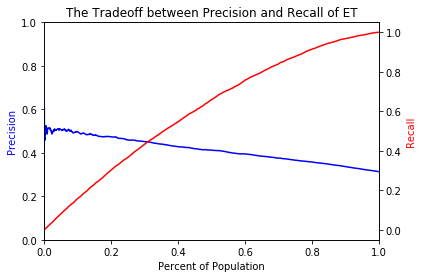

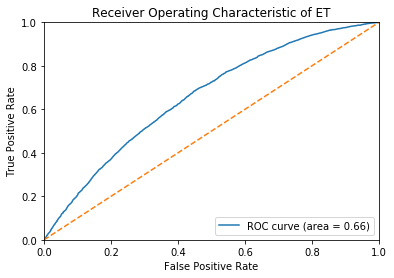

<Figure size 432x288 with 0 Axes>

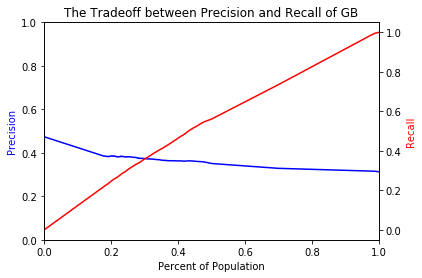

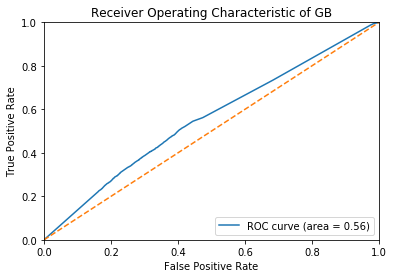

In [274]:
# Performances of different models using dataset 2
df2 = pl.evaluate_classifier(best_paras, train2, test2, train_target2, test_target2, ks)

<Figure size 432x288 with 0 Axes>

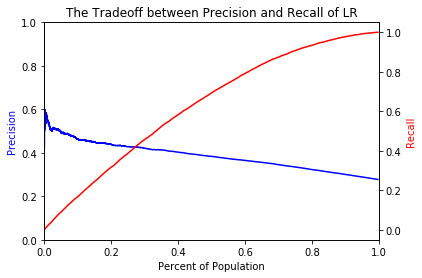

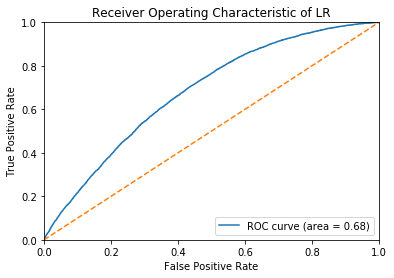

<Figure size 432x288 with 0 Axes>

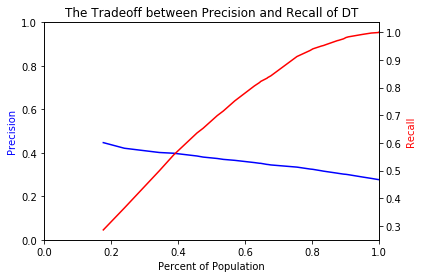

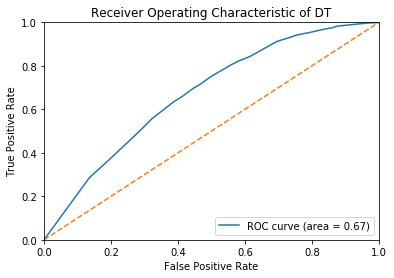

<Figure size 432x288 with 0 Axes>

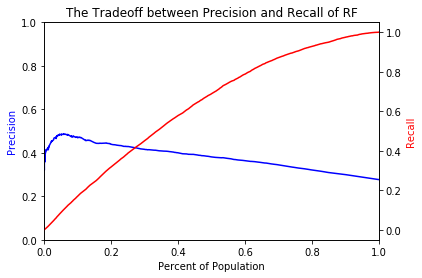

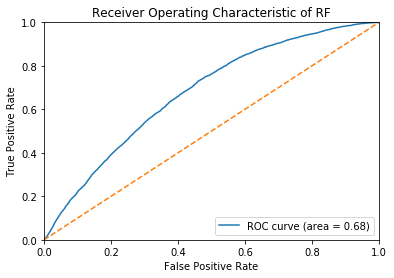

<Figure size 432x288 with 0 Axes>

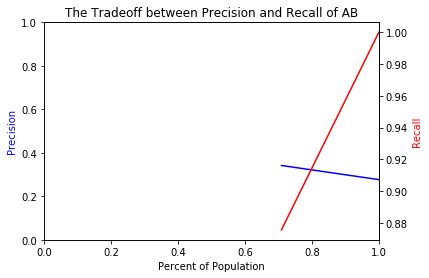

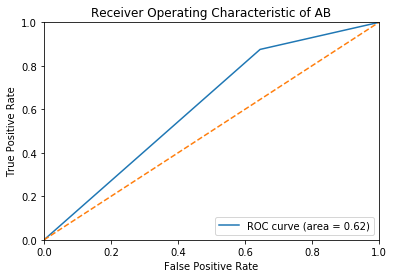

<Figure size 432x288 with 0 Axes>

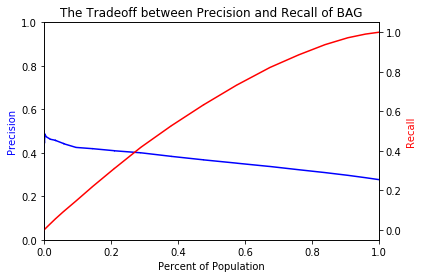

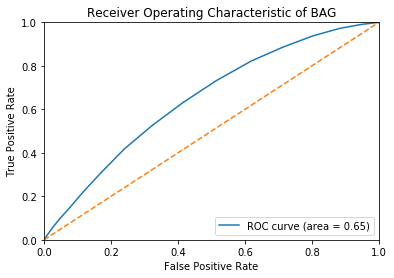

<Figure size 432x288 with 0 Axes>

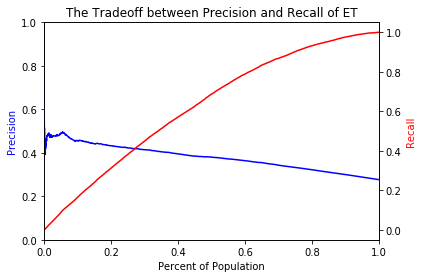

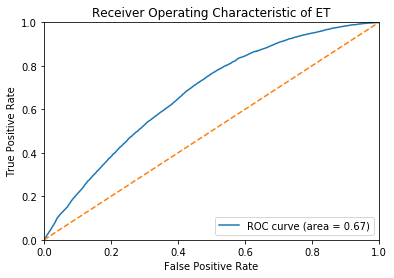

<Figure size 432x288 with 0 Axes>

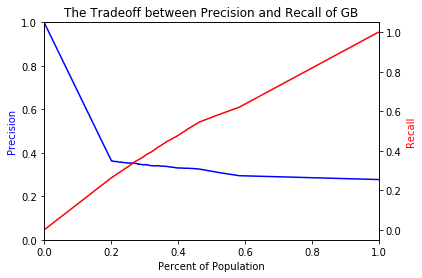

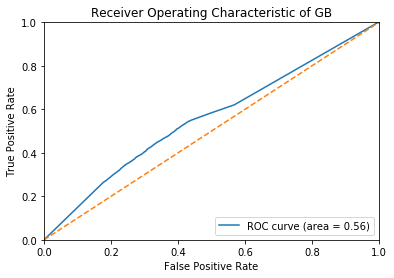

In [276]:
# Performances of different models using dataset 3
df3 = pl.evaluate_classifier(best_paras, train3, test3, train_target3, test_target3, ks)

# Step 8: Find the Best Model for Different Dataset
In this step, based on the performances of models in last step 7, I find the best model for three dataset separated by three timestamps (2012-07-01, 2013-01-01, 2013-07-01).

In [277]:
df1

Index,Classifier,a_at_1,a_at_10,a_at_2,a_at_20,a_at_30,a_at_5,a_at_50,best_paras,p_at_1,...,r_at_5,r_at_50,roc_at_1,roc_at_10,roc_at_2,roc_at_20,roc_at_30,roc_at_5,roc_at_50,train_time
0,AB,0.736301,0.703899,0.732826,0.668825,0.636185,0.720947,0.564373,{'n_estimators': 1},0.333333,...,0.0601118,0.623588,0.50189,0.515833,0.503606,0.532513,0.552355,0.506847,0.583558,0.053293
1,BAG,0.737786,0.716076,0.736272,0.685813,0.65448,0.729975,0.57251,"{'max_samples': 0.5, 'n_estimators': 20}",0.407738,...,0.0774495,0.639215,0.503818,0.53164,0.508079,0.554566,0.576105,0.518567,0.594122,5.8866
2,DT,0.736717,0.71768,0.734727,0.695673,0.664221,0.729322,0.586825,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.354167,...,0.0761948,0.666705,0.50243,0.533722,0.506074,0.567367,0.588751,0.517719,0.612705,0.149802
3,ET,0.739865,0.721244,0.737697,0.697514,0.664934,0.732173,0.586172,"{'n_estimators': 5, 'max_depth': 5, 'criterion...",0.511905,...,0.0816699,0.66545,0.506517,0.538348,0.509929,0.569757,0.589676,0.52142,0.611857,0.0767272
4,GB,0.735588,0.702474,0.73152,0.665617,0.625613,0.720828,0.527011,"{'n_estimators': 10, 'learning_rate': 0.5, 'ma...",0.297619,...,0.0598837,0.551842,0.500965,0.513982,0.50191,0.528349,0.53863,0.506693,0.535056,101.282
5,LR,0.739568,0.727718,0.739538,0.703692,0.6723,0.735975,0.596923,"{'C': 10, 'penalty': 'l1'}",0.497024,...,0.08897,0.686096,0.506131,0.546753,0.51232,0.577776,0.599238,0.526355,0.625814,2.8838
6,RF,0.737014,0.717977,0.734549,0.694188,0.667191,0.728193,0.591874,"{'max_depth': 5, 'n_estimators': 5}",0.369048,...,0.0740276,0.6764,0.502816,0.534107,0.505843,0.565439,0.592606,0.516254,0.619259,0.06304


In [278]:
df2

Index,Classifier,a_at_1,a_at_10,a_at_2,a_at_20,a_at_30,a_at_5,a_at_50,best_paras,p_at_1,...,r_at_5,r_at_50,roc_at_1,roc_at_10,roc_at_2,roc_at_20,roc_at_30,roc_at_5,roc_at_50,train_time
0,AB,0.685118,0.664876,0.682354,0.640313,0.620421,0.677333,0.572307,{'n_estimators': 1},0.410156,...,0.0645282,0.615442,0.502249,0.517827,0.503383,0.53273,0.553062,0.510588,0.584044,0.11017
1,BAG,0.685585,0.678812,0.684768,0.665616,0.641753,0.683717,0.582117,"{'max_samples': 0.5, 'n_estimators': 20}",0.433594,...,0.0747234,0.631108,0.502792,0.534027,0.506189,0.562142,0.57786,0.518009,0.595447,11.8891
2,DT,0.685897,0.68434,0.686403,0.675114,0.659115,0.685897,0.608432,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.449219,...,0.0782047,0.673132,0.503154,0.540452,0.508089,0.573184,0.598041,0.520543,0.626037,0.345502
3,ET,0.686831,0.686286,0.687103,0.676827,0.657947,0.687921,0.599478,"{'n_estimators': 5, 'max_depth': 5, 'criterion...",0.496094,...,0.0814373,0.658834,0.50424,0.542715,0.508904,0.575175,0.596684,0.522896,0.615629,0.272687
4,GB,0.68543,0.662852,0.682432,0.640858,0.61139,0.675308,0.537973,"{'n_estimators': 10, 'learning_rate': 0.5, 'ma...",0.425781,...,0.0612955,0.560612,0.502611,0.515474,0.503474,0.533363,0.542564,0.508235,0.544133,441.268
5,LR,0.689167,0.692359,0.689984,0.681031,0.66472,0.690646,0.606952,"{'C': 10, 'penalty': 'l1'}",0.613281,...,0.0857889,0.67077,0.506955,0.549774,0.512252,0.580062,0.604557,0.526063,0.624317,0.463796
6,RF,0.688388,0.68395,0.688583,0.677839,0.658803,0.689867,0.601736,"{'max_depth': 5, 'n_estimators': 5}",0.574219,...,0.0845456,0.662439,0.50605,0.54,0.510623,0.576351,0.597679,0.525158,0.618254,0.171378


In [279]:
df3

Index,Classifier,a_at_1,a_at_10,a_at_2,a_at_20,a_at_30,a_at_5,a_at_50,best_paras,p_at_1,...,r_at_5,r_at_50,roc_at_1,roc_at_10,roc_at_2,roc_at_20,roc_at_30,roc_at_5,roc_at_50,train_time
0,AB,0.72052,0.691017,0.7167,0.658206,0.624011,0.707227,0.561036,{'n_estimators': 1},0.364458,...,0.061393,0.610236,0.502187,0.51553,0.503001,0.530308,0.543359,0.507888,0.576222,0.203083
1,BAG,0.722264,0.707377,0.721873,0.687378,0.661424,0.718234,0.586238,"{'max_samples': 0.5, 'n_estimators': 20}",0.451807,...,0.0812778,0.655764,0.504365,0.535963,0.509461,0.566742,0.590085,0.521635,0.607698,15.3522
2,DT,0.722805,0.71255,0.721753,0.696881,0.667318,0.716189,0.600072,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.478916,...,0.0775834,0.680756,0.505042,0.542423,0.509311,0.578612,0.597447,0.519081,0.624976,0.570086
3,ET,0.722865,0.714655,0.722354,0.69622,0.671529,0.722084,0.60344,"{'n_estimators': 5, 'max_depth': 5, 'criterion...",0.481928,...,0.0882321,0.686841,0.505117,0.545053,0.510062,0.577785,0.602705,0.526443,0.629182,0.239692
4,GB,0.720339,0.694325,0.717482,0.668611,0.630688,0.708249,0.539142,"{'n_estimators': 10, 'learning_rate': 0.5, 'ma...",0.355422,...,0.0632402,0.570683,0.501962,0.519661,0.503977,0.543304,0.551698,0.509165,0.548877,754.128
5,LR,0.724189,0.715978,0.723437,0.698926,0.67604,0.722745,0.606869,"{'C': 10, 'penalty': 'l1'}",0.548193,...,0.0894274,0.693035,0.506769,0.546705,0.511414,0.581166,0.608339,0.527269,0.633464,1.03097
6,RF,0.721783,0.717302,0.721091,0.699408,0.672852,0.721723,0.604463,"{'max_depth': 5, 'n_estimators': 5}",0.427711,...,0.0875801,0.688688,0.503764,0.548358,0.508485,0.581767,0.604358,0.525992,0.63046,0.272134


In [290]:
# Set k = 20, that is, to identify 20% of posted projects that are
# at highest risk of not getting fully funded to intervene with.
# And comparing three datasets historically.
criteria_20 = ['a_at_20', 'p_at_20', 'r_at_20', 'roc_at_20', 'train_time']

In [299]:
df1_at_20 = pl.best_model(df1, criteria_20)
for df in df1_at_20:
    print(df)

Index Classifier   a_at_20
5             LR  0.703692
3             ET  0.697514
2             DT  0.695673
6             RF  0.694188
1            BAG  0.685813
0             AB  0.668825
4             GB  0.665617
Index Classifier   p_at_20
5             LR  0.410157
3             ET  0.394713
2             DT   0.39011
6             RF  0.386397
1            BAG  0.365459
0             AB  0.322988
4             GB  0.314969
Index Classifier   r_at_20
5             LR  0.315045
3             ET  0.303182
2             DT  0.299646
6             RF  0.296795
1            BAG  0.280712
0             AB  0.248089
4             GB   0.24193
Index Classifier roc_at_20
5             LR  0.577776
3             ET  0.569757
2             DT  0.567367
6             RF  0.565439
1            BAG  0.554566
0             AB  0.532513
4             GB  0.528349
Index Classifier train_time
4             GB    101.282
1            BAG     5.8866
5             LR     2.8838
2             DT   0.149

In [300]:
df2_at_20 = pl.best_model(df2, criteria_20)
for df in df2_at_20:
    print(df)

Index Classifier   a_at_20
5             LR  0.681031
6             RF  0.677839
3             ET  0.676827
2             DT  0.675114
1            BAG  0.665616
4             GB  0.640858
0             AB  0.640313
Index Classifier   p_at_20
5             LR  0.485303
6             RF  0.477321
3             ET  0.474791
2             DT  0.470508
1            BAG  0.446759
4             GB  0.384855
0             AB  0.383492
Index Classifier   r_at_20
5             LR  0.309959
6             RF  0.304861
3             ET  0.303245
2             DT   0.30051
1            BAG  0.285341
4             GB  0.245804
0             AB  0.244933
Index Classifier roc_at_20
5             LR  0.580062
6             RF  0.576351
3             ET  0.575175
2             DT  0.573184
1            BAG  0.562142
4             GB  0.533363
0             AB   0.53273
Index Classifier train_time
4             GB    441.268
1            BAG    11.8891
5             LR   0.463796
2             DT   0.345

In [301]:
df3_at_20 = pl.best_model(df3, criteria_20)
for df in df3_at_20:
    print(df)

Index Classifier   a_at_20
6             RF  0.699408
5             LR  0.698926
2             DT  0.696881
3             ET   0.69622
1            BAG  0.687378
4             GB  0.668611
0             AB  0.658206
Index Classifier   p_at_20
6             RF  0.440451
5             LR  0.439248
2             DT  0.434135
3             ET  0.432481
1            BAG  0.410376
4             GB  0.363459
0             AB  0.337444
Index Classifier   r_at_20
6             RF  0.318266
5             LR  0.317397
2             DT  0.313702
3             ET  0.312507
1            BAG  0.296534
4             GB  0.262632
0             AB  0.243834
Index Classifier roc_at_20
6             RF  0.581767
5             LR  0.581166
2             DT  0.578612
3             ET  0.577785
1            BAG  0.566742
4             GB  0.543304
0             AB  0.530308
Index Classifier train_time
4             GB    754.128
1            BAG    15.3522
5             LR    1.03097
2             DT   0.570

In [302]:
# To identify 5% of posted projects that are at highest risk of not getting
# fully funded to intervene with, I set k = 5.
# Using dataset 2 as the selected dataset.
criteria_5 = ['a_at_5', 'p_at_5', 'r_at_5', 'roc_at_5', 'train_time']

In [303]:
df2_at_5 = pl.best_model(df2, criteria_5)
for df in df2_at_5:
    print(df)

Index Classifier    a_at_5
5             LR  0.690646
6             RF  0.689867
3             ET  0.687921
2             DT  0.685897
1            BAG  0.683717
0             AB  0.677333
4             GB  0.675308
Index Classifier    p_at_5
5             LR  0.537383
6             RF  0.529595
3             ET  0.510125
2             DT  0.489875
1            BAG  0.468069
0             AB  0.404206
4             GB  0.383956
Index Classifier     r_at_5
5             LR  0.0857889
6             RF  0.0845456
3             ET  0.0814373
2             DT  0.0782047
1            BAG  0.0747234
0             AB  0.0645282
4             GB  0.0612955
Index Classifier  roc_at_5
5             LR  0.526063
6             RF  0.525158
3             ET  0.522896
2             DT  0.520543
1            BAG  0.518009
0             AB  0.510588
4             GB  0.508235
Index Classifier train_time
4             GB    441.268
1            BAG    11.8891
5             LR   0.463796
2             DT

The overall performances of different models across different dataset is constant. To evaluate which model does better on which metrics, I selected the standard of identifying 20% of posted projects that are at highest risk of not getting fully funded, and compared three datasets historically. 

For the first dataset, I trained models with the data from 2012-01-01 to 2012-06-30, and used the data from 2012-09-01 to 2013-03-01 to validate and evaluate the models I trained. For the second dataset, I trained models with the data from 2012-01-01 to 2013-01-01, and use the data from 2013-03-01 to 2013-09-01 to validate and evaluate the models I trained. For the third dataset, I trained models with the data from 2012-01-01 to 2013-06-30, and use the data from 2012-09-01 to 2013-12-31 to validate and evaluate the models I trained. There are two things that should be noted: there is a 60 days gap between training data and testing data; there is only 4-month data for the third testing data. Thus, I selected the performances of the models in the second dataset to analyze.

With the 20% of posted projects that are at highest risk of not getting fully funded in the second dataset, we can find that Logistic Regression (LR) performs best in the metrics of precision score (0.4853), recall score (0.3099), accuracy score (0.6810) and ROC-AUC score (0.58). Meanwhile, compared with the model with the shortest training time (AdaBoosting, 0.1101), the training time (0.4638) of LR is not disadvantageous. Thus, based on the comprehensive analysis, Logistic Regression performs best overall at the 20% of posted projects that are at highest risk of not getting fully funded.

To find the best model used to identify 5% of posted projects to intervene, I set all criteria at 5%. Also, I selected the performances of the models in the second dataset to analyze. Based on the outcomes, we can find that Logistic Regression (LR) performs best in the metrics of precision score (0.5373), recall score (0.8579), accuracy score (0.6906) and ROC-AUC score (0.5261). In addition, the training time (0.4638) of Logistic Regression model is appropriate. Therefore, Logistic Regression is the best model at the 5% of posted projects that are at highest risk of not getting fully funded.
